**To determine whether they have bird flu, 50 people have their blood tested. However, rather than testing each individual separately, it is decided to first place the people into groups of 5. The blood samples of the 5 people in each group will be pooled and analyzed together. If the test is negative, one test will suffice for the 5 people, whereas if the test is positive, each of
the 5 people will also be individually tested and, in all, 6 tests will be made on this group. Note that we assume that the pooled test will be positive if at least one person in the pool has bird flu. Assume that the probability that a person has bird flu is 15% for all people, independently of each other. Let $X_i$ be the random variable representing the number of tests required for $i\text{-th}$ random group of 5 people, where $i=1,2,\ldots,10.$ Let $X$ be the random variable representing the number of tests required for all 50 people. Note that $$X = X_1+X_2+\cdots+X_{10}.$$**

In [2]:
library(ggplot2)

**Question-1**: we want to the calculate the probability that $X_i$ takes a particular value for the $i$th group of 5 people. To this end, we will perform $10^5$ Monte-Carlo simulations for the number of tests required for a group of 5 people.

In [1]:
## Monte-Carlo simulation for a group of 5 people

# Sampling space for a group of 5 people (0 corresponds to test negative,
# 1 corresponds to test positive)
S = c(0, 1)

# Correspnding probabilites for the outcomes in the sampling space
p = c(0.85, 0.15)

samplesize = 10000

# Function to simulate how many tests will be needed for a group of 5 people
testResult = function(){
  npersons = 5
  result = sample(S, size = 5, replace = TRUE, prob = p)
  return(ifelse(any(result == 1), 6, 1))
}

# Generate simulated data
simulatedData = replicate(samplesize, testResult())

#print(simulatedData) # for checking purpose, set samplesize = 10 and uncomment this line

# Print probability values
table(simulatedData) / samplesize

simulatedData
     1      6 
0.4445 0.5555 

**Question-2**: we want a frequency histogram of values that $X_i$ can take.

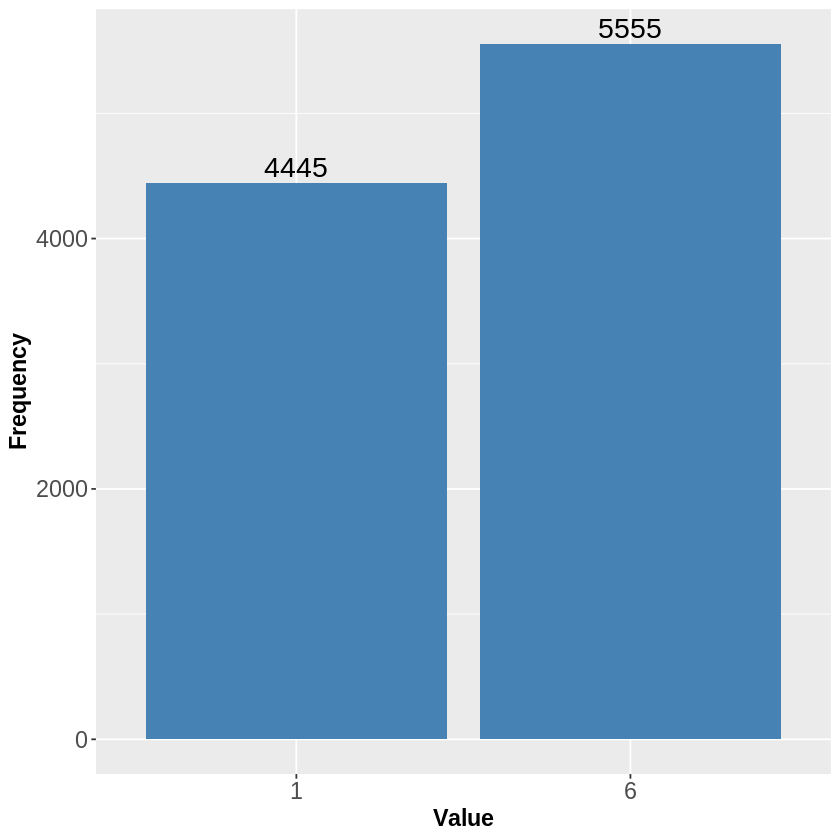

In [5]:
# Create dataframe comprising frequency of each possible value
# that X_i takes
df= as.data.frame(table(simulatedData))
colnames(df) = c('Value', 'Frequency')
#print(df)

# Frequency plot
p = ggplot(data = df, aes(x = Value, y = Frequency)) +
  geom_bar(stat = 'identity', fill = "steelblue") +
  geom_text(aes(label = Frequency), vjust = -0.3, size = 6)+
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))

p

**Question-3**: we want to the calculate the probability that $X = X_1+X_2+\cdots+X_{10}$ takes a particular value for a collection of 50 people which includes 10 groups of 5 people each. To this end, we will perform $10^5$ Monte-Carlo simulations for the number of tests required for all 10 groups.

In [8]:
## Monte-Carlo simulation for a collection of 50 people 

# Sampling space for a group of 5 people (0 corresponds to test negative,
# 1 corresponds to test positive)
S = c(0, 1)

# Correspnding probabilites for the outcomes in the sampling space
p = c(0.85, 0.15)

samplesize = 100000

# Simulate how many tests will be needed for all 10 groups of 50 people
testResult = function(){
  ngroups = 10
  npersons = 5
  result = numeric(ngroups)  
  for (j in c(1:ngroups)){
      group_result = sample(S, size = 5, replace = TRUE, prob = p)
      result[j] = ifelse(any(group_result == 1), 6, 1)      
      }    
  return(sum(result))
}

# Generate simulated data
simulatedData = replicate(samplesize, testResult())
#print(simulatedData)

# Print probability values
table(simulatedData) / samplesize


simulatedData
     10      15      20      25      30      35      40      45      50      55 
0.00033 0.00320 0.02045 0.06949 0.15319 0.23083 0.24147 0.17429 0.08176 0.02198 
     60 
0.00301 

**Question-2**: we want a frequency histogram of values that $X$ can take.

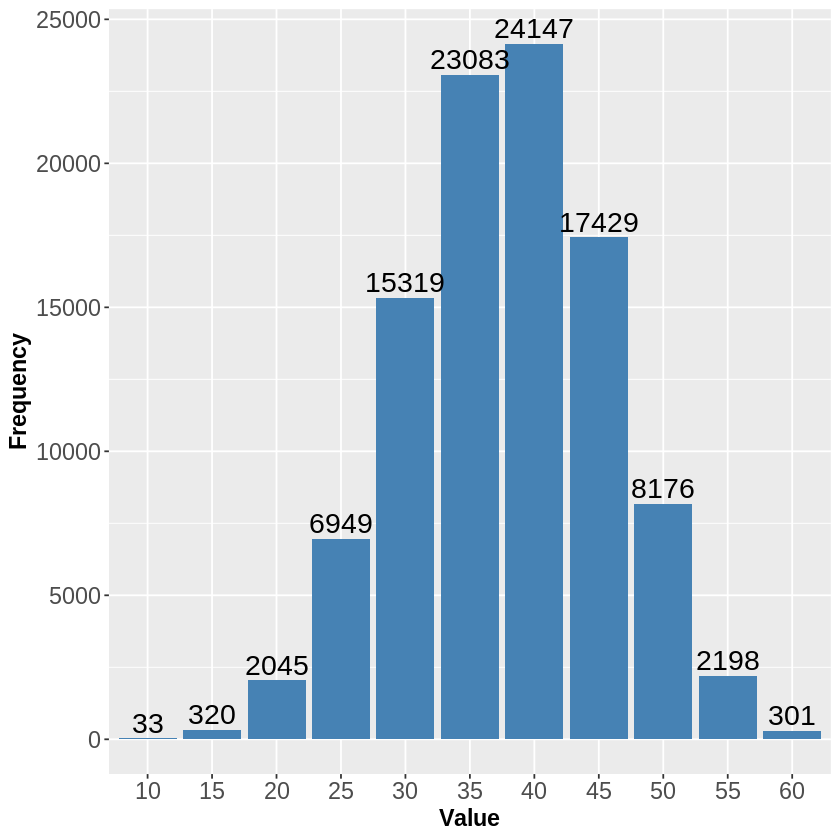

In [10]:
# Create dataframe comprising frequency of each possible value
df= as.data.frame(table(simulatedData))
colnames(df) = c('Value', 'Frequency')
#print(df)

# Frequency plot
p = ggplot(data = df, aes(x = Value, y = Frequency)) +
  geom_bar(stat = 'identity', fill = "steelblue") +
  geom_text(aes(label = Frequency), vjust = -0.3, size = 6)+
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))

p

**Question-5**: we want the mean and median number of tests required for all 50 people. Which one is greater? How does this relate to the shape of the histogram in the previous part?

In [11]:
# Mean number of tests needed
mean(simulatedData)

# Median number of tests needed
median(simulatedData)

[1] 37.85165

[1] 40